In [1]:
import os
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import time
from torch.optim import lr_scheduler
from my_pytorch_imports import DatasetFromNp

from torch.utils.data import Dataset
from torch.utils.data import random_split

from torchvision import transforms, models
import MyEDFImports as m


In [2]:
data_dir = '../images_cwt_ssq/(15017, 224, 224)_my_scales_sqpy.npy'
data_np = np.load(data_dir)
d = m.load_all_data()
targets = m.load_all_labels()
d, targets = m.remove_ecg_artifacts(d, targets)
targets = m.three_stages_transform(targets)
assert len(targets) == len(data_np)

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CN223100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CX230050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DG220020.edf...
EDF file detected
Setting chann

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:41: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LA216100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LM230010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/TK221110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:41: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


<RawEDF | CN223100.edf, 1 x 15611000 (31222.0 s), ~6 kB, data not loaded> with 1561 windows
<RawEDF | CP229110.edf, 1 x 20078000 (40156.0 s), ~6 kB, data not loaded> with 2007 windows
<RawEDF | CX230050.edf, 1 x 17981000 (35962.0 s), ~6 kB, data not loaded> with 1798 windows
<RawEDF | DG220020.edf, 1 x 17756000 (35512.0 s), ~6 kB, data not loaded> with 1775 windows
<RawEDF | DO223050.edf, 1 x 18066500 (36133.0 s), ~6 kB, data not loaded> with 1806 windows
<RawEDF | LA216100.edf, 1 x 16333500 (32667.0 s), ~6 kB, data not loaded> with 1633 windows
<RawEDF | LM230010.edf, 1 x 17246500 (34493.0 s), ~6 kB, data not loaded> with 1724 windows
<RawEDF | TK221110.edf, 1 x 15991000 (31982.0 s), ~6 kB, data not loaded> with 1599 windows
<RawEDF | VC209100.edf, 1 x 18434500 (36869.0 s), ~6 kB, data not loaded> with 1843 windows
<RawEDF | VP214110.edf, 1 x 17252500 (34505.0 s), ~6 kB, data not loaded> with 1725 windows
<RawEDF | WD224010.edf, 1 x 17774000 (35548.0 s), ~6 kB, data not loaded> with 1

In [3]:
loaded_model = torch.load('/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/saved_models/ResNet_Aug-14-2023')
print(loaded_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataset_all = DatasetFromNp(data_np, targets)

dl_for_all = torch.utils.data.DataLoader(dataset_all, batch_size=1, num_workers=4)
loaded_model.to(device)
loaded_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

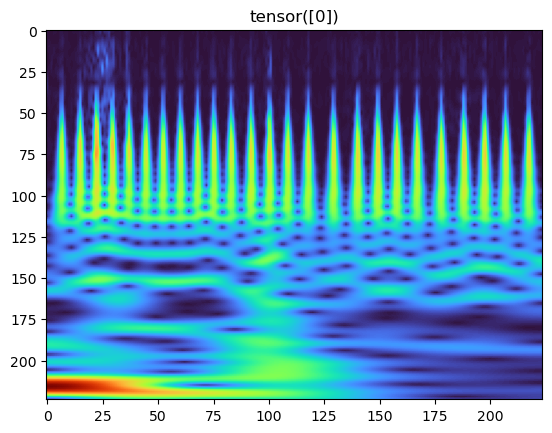

In [5]:
def vis_dataloader(dl):
    d, t = next(iter(dl))
    d = d[0][0]
    plt.imshow(d, aspect='auto', cmap='turbo')
    plt.title(t)
vis_dataloader(dl_for_all)

In [6]:
def eval_model(model):
    with torch.no_grad():
        labels = []
        predictions_tensor = []
        for i, l in dl_for_all:
            i = i.to(device, dtype=torch.float32)
            p = model(i)
            predictions_tensor.append(p)
            labels.append(l)
    labels = torch.flatten(torch.stack(labels))
    predictions = [torch.max(y, 1).indices for y in predictions_tensor]
    predictions = torch.flatten(torch.stack(predictions)).to('cpu')
    return predictions, labels

Wait it doesn't make sense to test it on raw images when it takes in images i just realized (bro)

In [7]:
pred, labels = eval_model(loaded_model)

In [8]:
torch.all(pred == 1)

tensor(True)

In [9]:
torch.all(pred == 0)

tensor(False)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(labels, predictions.to('cpu'))

NameError: name 'predictions' is not defined

In [ ]:
from collections import Counter

Counter(labels.tolist())